In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Ex 4.1

In [3]:
def conf_bound_ratio(T, sigma_sqr, delta):
    t = np.arange(1, T + 1)
    conf_bound_1 = np.sqrt(1 + 1 / (t * sigma_sqr)) * np.sqrt((2 * np.log(1 / delta) + np.log(t * sigma_sqr + 1)) / t)
    conf_bound_2 = np.sqrt((2 * np.log(2 / delta)) / t)
    return conf_bound_1 / conf_bound_2

The optimal t for sigma^2 = 1.0 is 8
The optimal t for sigma^2 = 0.1 is 82
The optimal t for sigma^2 = 0.01 is 821
The optimal t for sigma^2 = 0.001 is 8212
The optimal t for sigma^2 = 0.0001 is 82120
The optimal t for sigma^2 = 1e-05 is 821197
The optimal t for sigma^2 = 1e-06 is 8211968


C:\Users\Wenhao\AppData\Local\Temp\ipykernel_39988\3795402273.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_1.show()
C:\Users\Wenhao\AppData\Local\Temp\ipykernel_39988\3795402273.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_2.show()


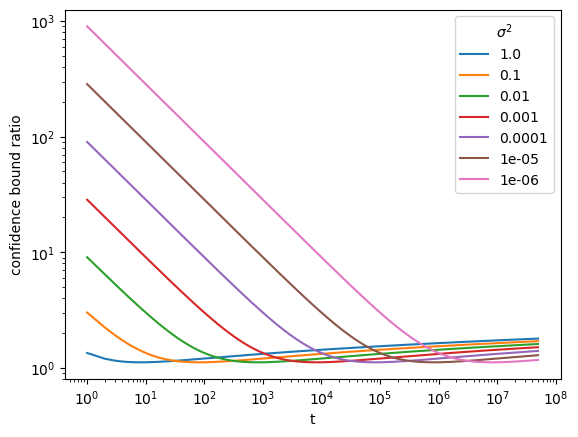

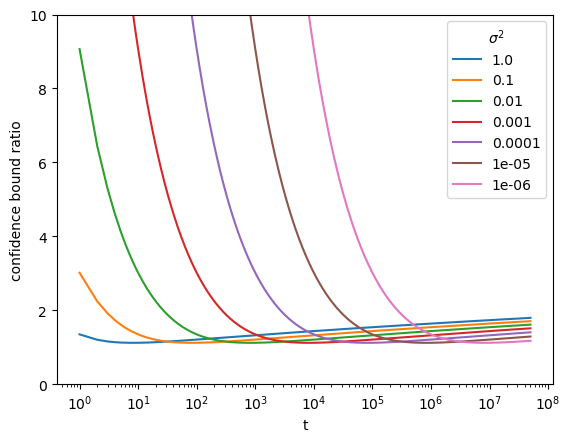

In [4]:
delta = 0.05
sigma_sqrs = 1 / (10 ** np.arange(7))
T = 5e7

fig_1, ax_1 = plt.subplots()
fig_2, ax_2 = plt.subplots()
for i in range(len(sigma_sqrs)):
    result = conf_bound_ratio(T, sigma_sqrs[i], delta)
    print(rf"The optimal t for sigma^2 = {sigma_sqrs[i]} is {np.argmin(result) + 1}")
    ax_1.loglog(np.arange(1, T + 1), result, label = sigma_sqrs[i])
    ax_2.semilogx(np.arange(1, T + 1), result, label = sigma_sqrs[i])

ax_1.set_xlabel("t")
ax_1.set_ylabel("confidence bound ratio")
ax_1.legend(title = r"$\sigma^2$")
fig_1.show()

ax_2.set_xlabel("t")
ax_2.set_ylim(0, 10)
ax_2.set_ylabel("confidence bound ratio")
ax_2.legend(title = r"$\sigma^2$")
fig_2.show()

In [55]:
sigma_sqr = 1e-4
t = 82120
delta = 0.05
bound = np.sqrt(1 + 1 / (t * sigma_sqr)) * np.sqrt((2 * (np.log(1 / delta)) + np.log(t * sigma_sqr + 1)) / t)
bound

0.010591360280542013

In [54]:
sigma_sqr = 1e-5
t = 821197
delta = 0.05
bound = np.sqrt(1 + 1 / (t * sigma_sqr)) * np.sqrt((2 * (np.log(1 / delta)) + np.log(t * sigma_sqr + 1)) / t)
bound

0.003349288318393692

In [53]:
bound

0.003349288318393692

## 4.2

In [13]:
def f_design_obj(A, X):
    A_inv = np.linalg.inv(A)
    return np.max(np.diag(X @ A_inv @ X.T))

def g_design_obj(A):
    return np.linalg.det(A)

def greedy(N, n, d, X):
    I = np.zeros(N)
    I[:2 * d] = rng.integers(n, size = 2 * d)

    for t in np.arange(2 * d, N):
        design_objs = np.zeros(n)
        for k in np.arange(n):
            A = np.outer(X[k,:], X[k,:])
            X_I = X[I[:t].astype(int), :]
            A += X_I.T @ X_I
            design_objs[k] = g_design_obj(A)
        I[t] = np.argmax(design_objs)
    
    return I

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_39988\3946703167.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_1.show()
C:\Users\Wenhao\AppData\Local\Temp\ipykernel_39988\3946703167.py:67: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_2.show()


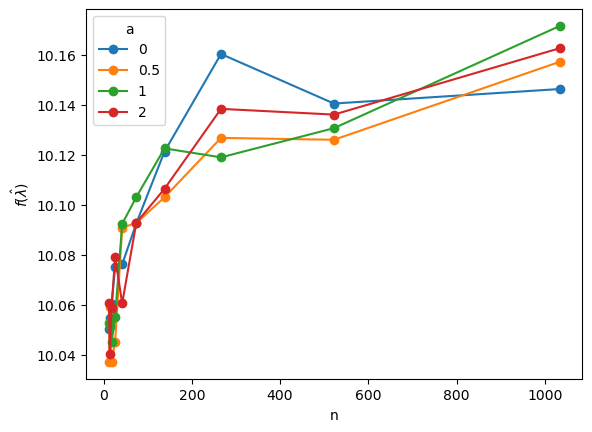

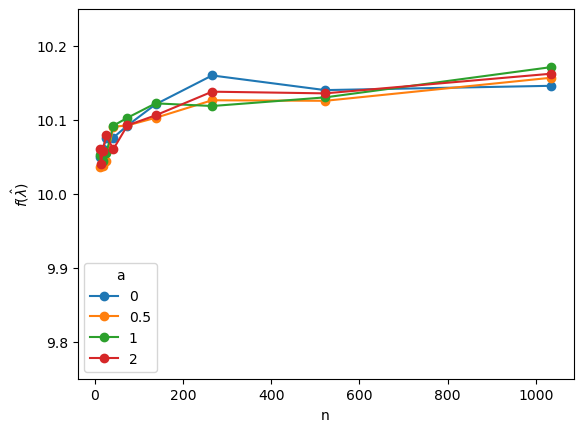

In [14]:
n_range = 10 + 2 ** np.arange(1, 11)
d = 10
N = 1000

rng = np.random.default_rng(541)

fig_1, ax_1 = plt.subplots()
fig_2, ax_2 = plt.subplots()

# a = 0
a = 0
cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
final_objs_1 = np.zeros(len(n_range))
for i in range(len(n_range)):
    X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
    I = greedy(N, n_range[i], d, X)
    final_objs_1[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)

ax_1.plot(n_range, final_objs_1, "o-", label=a)
ax_2.plot(n_range, final_objs_1, "o-", label=a)

# a = 0.5
a = 0.5
cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
final_objs_2 = np.zeros(len(n_range))
for i in range(len(n_range)):
    X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
    I = greedy(N, n_range[i], d, X)
    final_objs_2[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)

ax_1.plot(n_range, final_objs_2, "o-", label=a)
ax_2.plot(n_range, final_objs_2, "o-", label=a)

# a = 1
a = 1
cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
final_objs_3 = np.zeros(len(n_range))
for i in range(len(n_range)):
    X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
    I = greedy(N, n_range[i], d, X)
    final_objs_3[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)

ax_1.plot(n_range, final_objs_3, "o-", label=a)
ax_2.plot(n_range, final_objs_3, "o-", label=a)

# a = 2
a = 2
cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
final_objs_4 = np.zeros(len(n_range))
for i in range(len(n_range)):
    X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
    I = greedy(N, n_range[i], d, X)
    final_objs_4[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)

ax_1.plot(n_range, final_objs_4, "o-", label=a)
ax_2.plot(n_range, final_objs_4, "o-", label=a)

ax_1.legend(title="a")
ax_1.set_xlabel("n")
ax_1.set_ylabel(r"$f(\hat{\lambda})$")
fig_1.show()

ax_2.legend(title="a")
ax_2.set_xlabel("n")
ax_2.set_ylabel(r"$f(\hat{\lambda})$")
ax_2.set_ylim(9.75, 10.25)
fig_2.show()

## 4.3

In [1]:
import numpy as np
np.random.seed(541)
n = 300
X = np.concatenate((np.linspace(0, 1, 50), 0.25 + 0.01 * np.random.randn(250)), 0)
X = np.sort(X)

K = np.zeros ((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = 1 + min(X[i], X[j])

e, v = np.linalg.eigh(K) # eigenvalues are increasing in order
d = 30
Phi = np.real(v @ np.diag(np.sqrt(np.abs(e))))[:, (n - d)::]

def f(x):
    return -x ** 2 + x * np.cos(8 * x) + np.sin(15 * x)

f_star = f(X)

theta = np.linalg.lstsq(Phi, f_star, rcond = None)[0]
f_hat = Phi @ theta

In [4]:
def G_optimal(N, n, d, X):
    def g_design_obj(A):
        return np.linalg.det(A)
    
    I = np.zeros(N)
    I[:2 * d] = np.random.randint(n, size = 2 * d)

    for t in np.arange(2 * d, N):
        design_objs = np.zeros(n)
        for k in np.arange(n):
            A = np.outer(X[k,:], X[k,:])
            X_I = X[I[:t].astype(int), :]
            A += X_I.T @ X_I
            design_objs[k] = g_design_obj(A)
        I[t] = np.argmax(design_objs)
    
    lbda = np.zeros(n)
    for i in I:
        lbda[int(i)] += 1
    lbda /= N

    return lbda

def observe(idx):
    return f(X[idx]) + np.random.randn(len(idx))

def sample_and_estimate(X, lbda, tau):
    n, d = X.shape
    reg = 1e-6 # we can add a bit of regularization to avoid divide by 0
    idx = np.random.choice(np.arange(n), size = tau , p = lbda)
    y = observe(idx)

    XtX = X[idx].T @ X[idx]
    XtY = X[idx].T @ y

    theta = np.linalg.lstsq (XtX + reg * np.eye(d), XtY, rcond = None)[0]
    return Phi @ theta, XtX

T = 1000

lbda_G = G_optimal(1000, n, 30, Phi)
f_G_Phi, A = sample_and_estimate(Phi, lbda_G, T)
conf_G = np.sqrt(np.sum(Phi @ np.linalg.inv(A) * Phi, axis = 1))

lbda_unif = np.ones(n) / n
f_unif_Phi, A = sample_and_estimate(Phi, lbda_unif , T)
conf_unif = np.sqrt(np.sum(Phi @ np.linalg.inv(A) * Phi, axis = 1))

In [48]:
from scipy.stats import uniform

def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

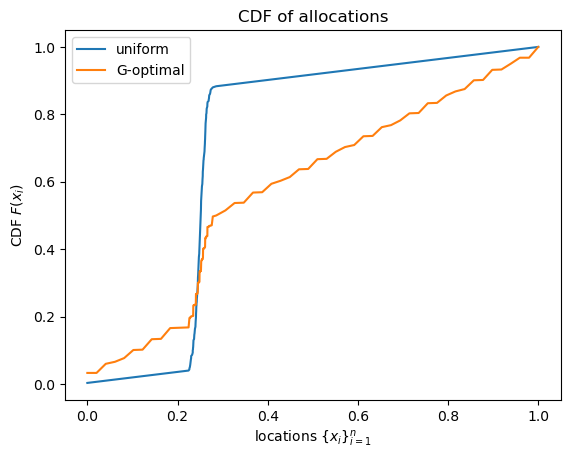

In [49]:
fig, ax = plt.subplots()
ax.plot(X, ecdf(X)[1], label = "uniform")
ax.plot(X, np.cumsum(lbda_G), label = "G-optimal")
ax.legend()
ax.set_xlabel(r"locations $\{x_i\}_{i=1}^n$")
ax.set_ylabel(r"CDF $F(x_i)$")
ax.set_title("CDF of allocations")
plt.show()

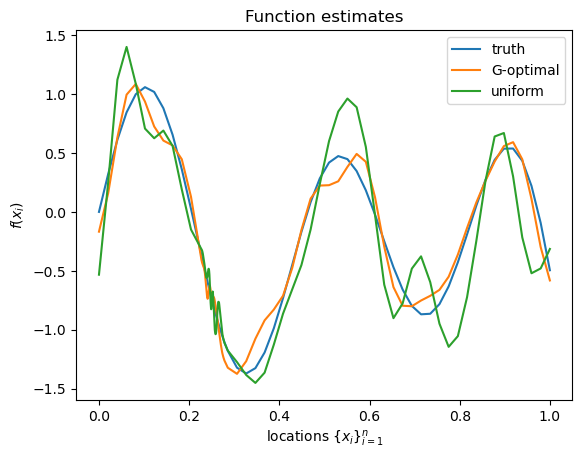

In [50]:
fig, ax = plt.subplots()
ax.plot(X, f_star, label = "truth")
ax.plot(X, f_G_Phi, label = "G-optimal")
ax.plot(X, f_unif_Phi, label = "uniform")
ax.legend()
ax.set_xlabel(r"locations $\{x_i\}_{i=1}^n$")
ax.set_ylabel(r"$f(x_i)$")
ax.set_title("Function estimates")
plt.show()

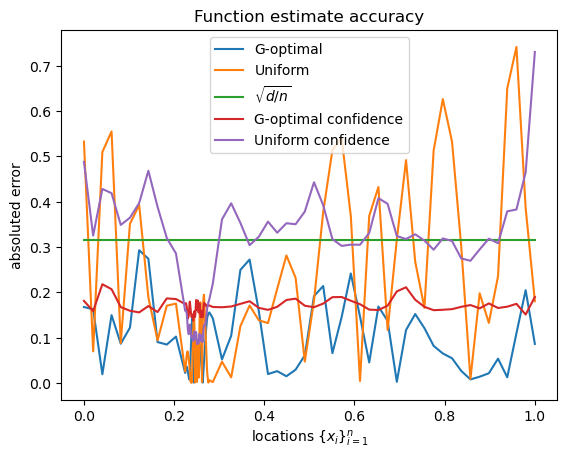

In [51]:
fig, ax = plt.subplots()
ax.plot(X, np.abs(f_G_Phi - f_star), label = "G-optimal")
ax.plot(X, np.abs(f_unif_Phi - f_star), label = "Uniform")
ax.plot(X, np.ones_like(X) * np.sqrt(d / n), label = r"$\sqrt{d/n}$")
ax.plot(X, conf_G, label = "G-optimal confidence")
ax.plot(X, conf_unif, label = "Uniform confidence")
ax.legend()
ax.set_xlabel(r"locations $\{x_i\}_{i=1}^n$")
ax.set_ylabel(r"absoluted error")
ax.set_title("Function estimate accuracy")
plt.show()

## 4.4

In [21]:
import numpy as np
np.random.seed(541)
n = 300
X = np.concatenate((np.linspace(0, 1, 50), 0.25 + 0.01 * np.random.randn(250)), 0)
X = np.sort(X)

K = np.zeros ((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = 1 + min(X[i], X[j])

e, v = np.linalg.eigh(K) # eigenvalues are increasing in order
d = 30
Phi = np.real(v @ np.diag(np.sqrt(np.abs(e))))[:, (n - d)::]

def f(x):
    return -x ** 2 + x * np.cos(8 * x) + np.sin(15 * x)

f_star = f(X)

theta = np.linalg.lstsq(Phi, f_star, rcond = None)[0]
f_hat = Phi @ theta

def G_optimal(N, n, d, X):
    def g_design_obj(A):
        return np.linalg.det(A)
    
    I = np.zeros(N)
    I[:2 * d] = np.random.randint(n, size = 2 * d)

    for t in np.arange(2 * d, N):
        design_objs = np.zeros(n)
        for k in np.arange(n):
            A = np.outer(X[k,:], X[k,:])
            X_I = X[I[:t].astype(int), :]
            A += X_I.T @ X_I
            design_objs[k] = g_design_obj(A)
        I[t] = np.argmax(design_objs)
    
    lbda = np.zeros(n)
    for i in I:
        lbda[int(i)] += 1
    lbda /= N

    return lbda

def observe(idx):
    return f(X[idx]) + np.random.randn(len(idx))

def sample_and_estimate(X, lbda, tau):
    n, d = X.shape
    reg = 1e-6 # we can add a bit of regularization to avoid divide by 0
    idx = np.random.choice(np.arange(n), size = tau , p = lbda)
    y = observe(idx)

    XtX = X[idx].T @ X[idx]
    XtY = X[idx].T @ y

    theta = np.linalg.lstsq (XtX + reg * np.eye(d), XtY, rcond = None)[0]
    return Phi @ theta, XtX

In [22]:
T = 40000
# T = 1000

tau = 100
delta = 1 / T
gam = 1
U = 1
N = 1000

V_k = gam * np.eye(d)
S_k = 0
# X_k = Phi
n, D = Phi.shape
active_idx = np.arange(n).tolist()

y_t = np.zeros(T)

# rng = np.random.default_rng(541)

for k in np.arange(1, int(np.floor(T / tau) + 1)):
# k = 1

    # n, d = X_k.shape
    n = len(active_idx)
    X_active = Phi[active_idx]

    # first line
    lam_k = G_optimal(N, n, 30, X_active)

    # second line
    idxs = np.random.choice(active_idx, size = tau, replace=True, p = lam_k)

    # third line
    xs = Phi[idxs]
    ys = observe(idxs)
    y_t[(k-1) * tau: k*tau] = ys

    # fourth line
    V_k += xs.T @ xs
    S_k += (xs.T * ys).T.sum(axis = 0)
    theta_k = np.linalg.solve(V_k, S_k)

    # fifth line
    beta_k = np.sqrt(gam) * U + np.sqrt(2 * np.log(1 / delta) + np.log(np.linalg.det(V_k) / gam ** D))

    # sixth line
    x_k = X_active[np.argmax(X_active @ theta_k)]

    # last line
    # active_idx = [
    #     idx for idx in active_idx if 
    #     np.dot(x_k - Phi[idx], theta_k) < 
    #     (beta_k * np.sqrt(np.dot(x_k - Phi[idx], np.linalg.solve(V_k, x_k - Phi[idx]))))
    # ]
    temp = []
    for idx in active_idx:
        diff = x_k - Phi[idx]
        lhs = np.dot(diff, theta_k)
        rhs = beta_k * np.sqrt(np.dot(diff, np.linalg.solve(V_k, diff)))
        if lhs < rhs:
            temp.append(idx)
    active_idx = temp

    print(f"At round {k}, the regret is {np.sum(f_star.max() - y_t[:k*tau])}")

    

At round 1, the regret is 125.2436610057658
At round 2, the regret is 268.44678274007185
At round 3, the regret is 407.5882811508035
At round 4, the regret is 548.8044371532948
At round 5, the regret is 693.648509799212
At round 6, the regret is 839.9159507337404
At round 7, the regret is 956.1878610462052
At round 8, the regret is 1088.0453695675487
At round 9, the regret is 1214.5731475176012
At round 10, the regret is 1321.1745547127584
At round 11, the regret is 1437.645255432746
At round 12, the regret is 1569.2952367178054
At round 13, the regret is 1699.887987587239
At round 14, the regret is 1831.7783057255028
At round 15, the regret is 1969.0813176730358
At round 16, the regret is 2097.365385159366
At round 17, the regret is 2231.455726793224
At round 18, the regret is 2372.3783454663862
At round 19, the regret is 2509.1703232017726
At round 20, the regret is 2653.0701860281697
At round 21, the regret is 2809.4933915078486
At round 22, the regret is 2955.8951683900436
At round

ValueError: high <= 0

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_3196\930962758.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


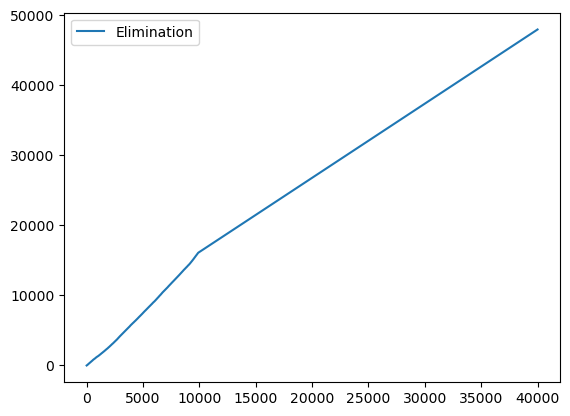

In [23]:
fig, ax = plt.subplots()
ax.plot(np.arange(T), np.cumsum(f_star.max() - y_t), label = "Elimination")
ax.legend()
fig.show()

In [58]:
import numpy as np
np.random.seed(541)

In [67]:
def generate_data():
    def f(x):
        return -x ** 2 + x * np.cos(8 * x) + np.sin(15 * x)
    
    n = 300
    X = np.concatenate((np.linspace(0, 1, 50), 0.25 + 0.01 * np.random.randn(250)), 0)
    X = np.sort(X)

    K = np.zeros ((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = 1 + min(X[i], X[j])

    e, v = np.linalg.eigh(K) # eigenvalues are increasing in order
    d = 30
    Phi = np.real(v @ np.diag(np.sqrt(np.abs(e))))[:, (n - d)::]

    f_star = f(X)

    return X, Phi, f_star    

In [85]:
def UCB(T, X, Phi):
    def observe(idx):
        return f(X[idx]) + np.random.randn(len(idx))

    delta = 1 / T
    gam = 1
    U = 1

    V_t = gam * np.eye(d)
    S_t = np.zeros(d)
    n, D = Phi.shape

    y_t = np.zeros(T)

    for t in range(T):
        beta_t = np.sqrt(gam) * U + np.sqrt(2 * np.log(1 / delta) + np.log(np.linalg.det(V_t) / gam ** D))
        theta_t = np.linalg.solve(V_t, S_t)
        max_idx = np.argmax(Phi @ theta_t + beta_t * np.sqrt(np.diag(Phi @ np.linalg.inv(V_t) @ Phi.T)))
        x_t = Phi[max_idx]
        y_t[t] = observe(np.array([max_idx]))[0]
        V_t += np.outer(x_t, x_t)
        S_t += x_t * y_t[t]
    
    return y_t

In [86]:
def Thompson(T, X, Phi):
    def observe(idx):
        return f(X[idx]) + np.random.randn(len(idx))
    
    gam = 1
    V_t = gam * np.eye(d)
    S_t = np.zeros(d)
    n, D = Phi.shape

    y_t = np.zeros(T)

    for t in range(T):
        V_t_inv = np.linalg.inv(V_t)
        theta_t = V_t_inv @ S_t
        theta_t_sample = np.random.multivariate_normal(theta_t, V_t_inv)
        max_idx = np.argmax(Phi @ theta_t_sample)
        x_t = Phi[max_idx]
        y_t[t] = observe(np.array([max_idx]))[0]
        V_t += np.outer(x_t, x_t)
        S_t += x_t * y_t[t]
    
    return y_t

In [87]:
np.random.seed(541)

trial_1 = generate_data()
UCB_regret_1 = np.cumsum(trial_1[2].max() - UCB(40000, trial_1[0], trial_1[1]))
Thompson_regret_1 = np.cumsum(trial_1[2].max() - Thompson(40000, trial_1[0], trial_1[1]))

trial_2 = generate_data()
UCB_regret_2 = np.cumsum(trial_2[2].max() - UCB(40000, trial_2[0], trial_2[1]))
Thompson_regret_2 = np.cumsum(trial_2[2].max() - Thompson(40000, trial_2[0], trial_2[1]))

trial_3 = generate_data()
UCB_regret_3 = np.cumsum(trial_3[2].max() - UCB(40000, trial_3[0], trial_3[1]))
Thompson_regret_3 = np.cumsum(trial_3[2].max() - Thompson(40000, trial_3[0], trial_3[1]))

trial_4 = generate_data()
UCB_regret_4 = np.cumsum(trial_4[2].max() - UCB(40000, trial_4[0], trial_4[1]))
Thompson_regret_4 = np.cumsum(trial_4[2].max() - Thompson(40000, trial_4[0], trial_4[1]))

trial_5 = generate_data()
UCB_regret_5 = np.cumsum(trial_5[2].max() - UCB(40000, trial_5[0], trial_5[1]))
Thompson_regret_5 = np.cumsum(trial_5[2].max() - Thompson(40000, trial_5[0], trial_5[1]))

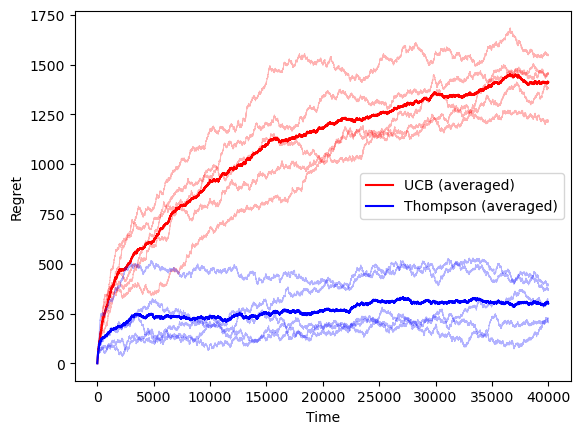

In [88]:
fig, ax = plt.subplots()
ax.plot(np.arange(T), UCB_regret_1, color = "red", alpha = 0.3, linewidth=0.7)
ax.plot(np.arange(T), UCB_regret_2, color = "red", alpha = 0.3, linewidth=0.7)
ax.plot(np.arange(T), UCB_regret_3, color = "red", alpha = 0.3, linewidth=0.7)
ax.plot(np.arange(T), UCB_regret_4, color = "red", alpha = 0.3, linewidth=0.7)
ax.plot(np.arange(T), UCB_regret_5, color = "red", alpha = 0.3, linewidth=0.7)
ax.plot(np.arange(T), 
        (UCB_regret_1 + UCB_regret_2 + UCB_regret_3 + + UCB_regret_4 + + UCB_regret_5) / 5, 
        color = "red", label = "UCB (averaged)")

ax.plot(np.arange(T), Thompson_regret_1, color = "blue", alpha = 0.3, linewidth=0.7)
ax.plot(np.arange(T), Thompson_regret_2, color = "blue", alpha = 0.3, linewidth=0.7)
ax.plot(np.arange(T), Thompson_regret_3, color = "blue", alpha = 0.3, linewidth=0.7)
ax.plot(np.arange(T), Thompson_regret_4, color = "blue", alpha = 0.3, linewidth=0.7)
ax.plot(np.arange(T), Thompson_regret_5, color = "blue", alpha = 0.3, linewidth=0.7)
ax.plot(np.arange(T), 
        (Thompson_regret_1 + Thompson_regret_2 + Thompson_regret_3 + + Thompson_regret_4 + + Thompson_regret_5) / 5, 
        color = "blue", label = "Thompson (averaged)")

ax.set_xlabel("Time")
ax.set_ylabel("Regret")
ax.legend()
plt.show()